In [1]:
!git clone https://github.com/eriklindernoren/ML-From-Scratch

Cloning into 'ML-From-Scratch'...
remote: Enumerating objects: 2558, done.
remote: Total 2558 (delta 0), reused 0 (delta 0), pack-reused 2558
Receiving objects: 100% (2558/2558), 553.45 KiB | 20.50 MiB/s, done.
Resolving deltas: 100% (1960/1960), done.


In [2]:
import sys
sys.path.append('/content/ML-From-Scratch')

Accuracy: 0.9101123595505618


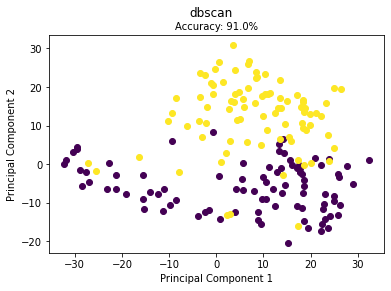

In [5]:
from __future__ import print_function, division
import numpy as np
from mlfromscratch.utils import Plot, euclidean_distance, normalize


class DBSCAN():
    """A density based clustering method that expands clusters from 
    samples that have more neighbors within a radius specified by eps
    than the value min_samples.

    Parameters:
    -----------
    eps: float
        The radius within which samples are considered neighbors
    min_samples: int
        The number of neighbors required for the sample to be a core point. 
    """
    def __init__(self, eps=1, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples

    def _get_neighbors(self, sample_i):
        """ Return a list of indexes of neighboring samples
        A sample_2 is considered a neighbor of sample_1 if the distance between
        them is smaller than epsilon """
        neighbors = []
        idxs = np.arange(len(self.X))
        for i, _sample in enumerate(self.X[idxs != sample_i]):
            distance = euclidean_distance(self.X[sample_i], _sample)
            if distance < self.eps:
                neighbors.append(i)
        return np.array(neighbors)

    def _expand_cluster(self, sample_i, neighbors):
        """ Recursive method which expands the cluster until we have reached the border
        of the dense area (density determined by eps and min_samples) """
        cluster = [sample_i]
        # Iterate through neighbors
        for neighbor_i in neighbors:
            if not neighbor_i in self.visited_samples:
                self.visited_samples.append(neighbor_i)
                # Fetch the sample's distant neighbors (neighbors of neighbor)
                self.neighbors[neighbor_i] = self._get_neighbors(neighbor_i)
                # Make sure the neighbor's neighbors are more than min_samples
                # (If this is true the neighbor is a core point)
                if len(self.neighbors[neighbor_i]) >= self.min_samples:
                    # Expand the cluster from the neighbor
                    expanded_cluster = self._expand_cluster(
                        neighbor_i, self.neighbors[neighbor_i])
                    # Add expanded cluster to this cluster
                    cluster = cluster + expanded_cluster
                else:
                    # If the neighbor is not a core point we only add the neighbor point
                    cluster.append(neighbor_i)
        return cluster

    def _get_cluster_labels(self):
        """ Return the samples labels as the index of the cluster in which they are
        contained """
        # Set default value to number of clusters
        # Will make sure all outliers have same cluster label
        labels = np.full(shape=self.X.shape[0], fill_value=len(self.clusters))
        for cluster_i, cluster in enumerate(self.clusters):
            for sample_i in cluster:
                labels[sample_i] = cluster_i
        return labels

    # DBSCAN
    def predict(self, X):
        self.X = X
        self.clusters = []
        self.visited_samples = []
        self.neighbors = {}
        n_samples = np.shape(self.X)[0]
        # Iterate through samples and expand clusters from them
        # if they have more neighbors than self.min_samples
        for sample_i in range(n_samples):
            if sample_i in self.visited_samples:
                continue
            self.neighbors[sample_i] = self._get_neighbors(sample_i)
            if len(self.neighbors[sample_i]) >= self.min_samples:
                # If core point => mark as visited
                self.visited_samples.append(sample_i)
                # Sample has more neighbors than self.min_samples => expand
                # cluster from sample
                new_cluster = self._expand_cluster(
                    sample_i, self.neighbors[sample_i])
                # Add cluster to list of clusters
                self.clusters.append(new_cluster)

        # Get the resulting cluster labels
        cluster_labels = self._get_cluster_labels()
        return cluster_labels


if __name__ == "__main__":
    main()
